In [1]:
import control as ctrl
import numpy as np
import matplotlib.pyplot as plt
from data_analysis.systems.control_systems import *
# plt.style.available
plt.style.use('notebook')

AttributeError: module 'matplotlib.pyplot' has no attribute 'get_cachedir'

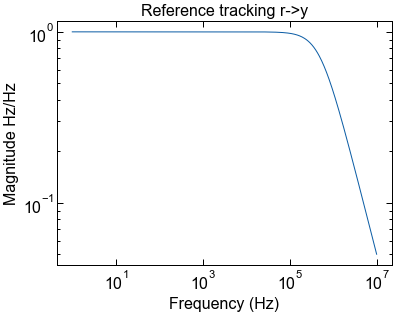

In [2]:
s = ctrl.tf('s')
sys = 10e6/(1 + s/(2*np.pi*1e5))
plant = ControlModule(sys_ref = sys, unit_in = 'V', unit_out = 'Hz')
plant.output_noise = np.ones(500)*1e4

sys = 0.5e-6*(1 + 2*np.pi*1e5/s)
servo = ControlModule(sys_ref = sys, unit_in = 'Hz', unit_out = 'V')

C_list = [servo,plant]
laser = feedback_combine(C_list,1)
laser.ref_input_noise = np.ones(500)*1e2
laser.freqresp_update()

laser.plot_ref_tracking()

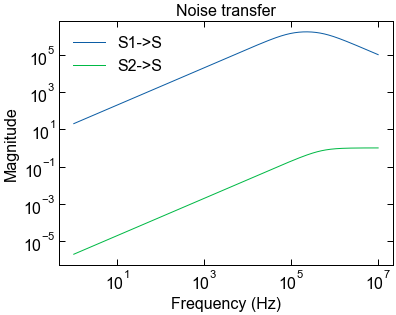

In [3]:
laser.plot_noise_transfer()

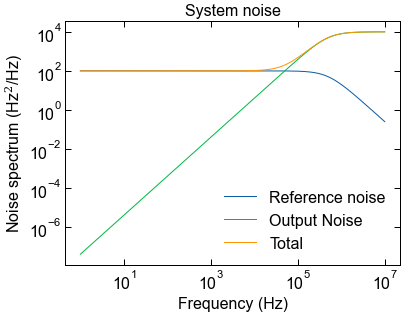

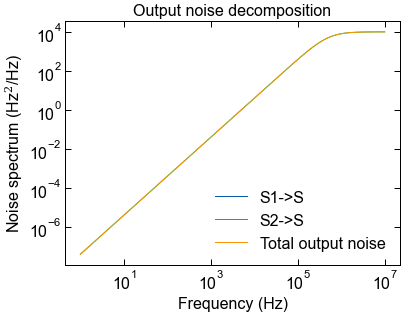

In [4]:
laser.plot_noise()